In [46]:
# %% load libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use("default")
import matplotlib as mpl
# Axes
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
# ticks
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
# grid
mpl.rcParams['grid.color'] = 'gray'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
# legend
mpl.rcParams['legend.fontsize'] = 14
# figure
mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.autolayout'] = True

from scipy.optimize import curve_fit

def powerlaw(x, a, gamma):
    return a*x**gamma

In [2]:
# %% load dataset and create adjacency matrix and network
female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
dim = max(female.max(), male.max())+1
adj = np.zeros((dim,dim))
for i,j in zip(female,male):
    adj[i,j] = 1
    adj[j,i] = 1
net = nx.from_numpy_array(adj)


In [3]:
id_female = np.unique(female)
id_male   = np.unique(male)

print("# Female = {}".format(len(id_female)))
print("# Male   = {}".format(len(id_male)))


# Female = 6624
# Male   = 10106


In [4]:
#position = nx.bipartite_layout(net, nodes=female)
#fig, ax = plt.subplots(figsize=(10,20))
#nx.draw(net, ax=ax, pos=position, node_size=1, alpha=.005)


Max degree = 305


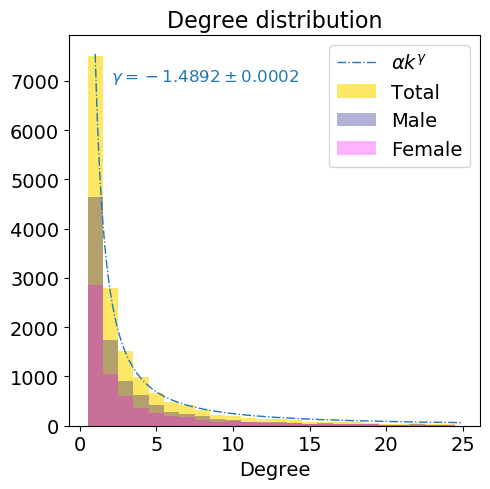

a     = 7548.74068 +/- 2137.46801
gamma =   -1.48922 +/-    0.00019


In [79]:
# %% degree distibution
deg = list(net.degree())
deg = np.array([x[1] for x in deg])
deg_female = deg[id_female]
deg_male   = deg[id_male]

print("Max degree = {}".format(max(deg)))
fig, ax = plt.subplots()
bins = [i+0.5 for i in range(0,25)]
dd, _, _ = ax.hist(deg, bins=bins, alpha=.6, color="gold", label="Total")
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
popt, popv = curve_fit(powerlaw, xdata=binscenters, ydata=dd, p0=[100, -1])
a, gamma = popt
a_err, gamma_err = popv[0,0], popv[1,1]
x = np.arange(binscenters[0], 25, .1)
ax.hist(deg_male, bins=bins, alpha=.3, color="navy", label="Male")
ax.hist(deg_female, bins=bins, alpha=.3, color="fuchsia", label="Female")
ax.plot(x, powerlaw(x, *popt), "-.", color="C0", lw=1, label="$\\alpha k^\\gamma$")
ax.annotate("$\\gamma = {:.4f} \\pm {:.4f}$".format(gamma, gamma_err), (2,7000), fontsize=12, color="C0")
ax.set_title("Degree distribution")
ax.set_xticks(np.arange(26, step=5))
ax.set_xlabel("Degree")
ax.legend()
ax.grid(False)
fig.savefig("Figure/Static/Degree_distribution.pdf")
plt.show()
print("a     = {:10.5f} +/- {:10.5f}".format(a, a_err))
print("gamma = {:10.5f} +/- {:10.5f}".format(gamma, gamma_err))

In [81]:
ass = nx.degree_assortativity_coefficient(net)
print("Assortativity =", ass)

Assortativity = -0.10973635444115823


In [82]:
print("number of connected component:", nx.number_connected_components(net))


number of connected component: 418


In [83]:
link=net.number_of_edges()
node=net.number_of_nodes()
conn=link/(node*(node-1)/2)
print("connectivity =", conn)



connectivity = 0.0002790091060628706


In [84]:
# %% active links and nodes
active_male, active_female = [], []
tot_male_t, tot_female_t = [], []
current_time, number_link  = np.unique(time, return_counts=True)

for t in current_time:
    # active nodes
    active_male.append  (len(np.unique(male[time==t])))
    active_female.append(len(np.unique(female[time==t])))
    # total members in community
    tot_male_t  .append(len(np.unique(male  [time<=t])))
    tot_female_t.append(len(np.unique(female[time<=t])))


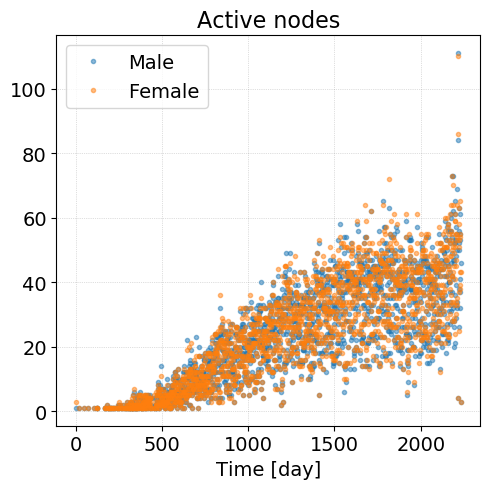

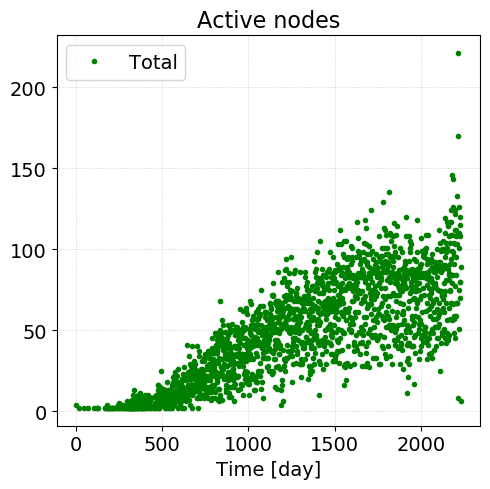

In [85]:
# %% Plot of active nodes
plt.figure()
plt.title("Active nodes")
plt.plot(current_time, active_male  , ".", label="Male"  , alpha=.5)
plt.plot(current_time, active_female, ".", label="Female", alpha=.5)
plt.xlabel("Time [day]")
plt.legend()
plt.savefig("./Figure/Static/Active_nodes_MF.pdf")
plt.show()

plt.figure()
plt.title("Active nodes")
plt.plot(current_time, np.add(active_female, active_male), "g.",label="Total")
plt.xlabel("Time [day]")
plt.legend()
plt.savefig("./Figure/Static/Active_nodes_total.pdf")
plt.show()


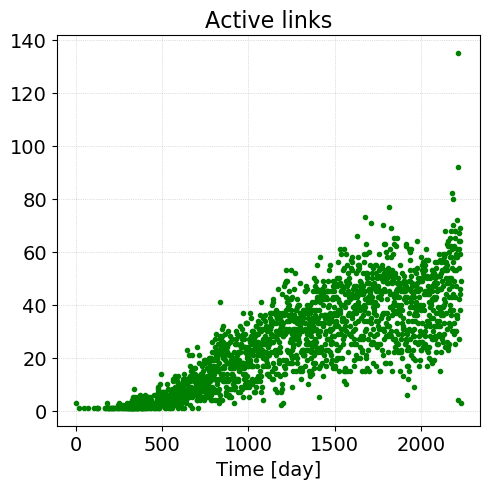

In [86]:
# %% Plot of active links
plt.figure()
plt.title("Active links")
plt.plot(current_time, number_link, "g.")
plt.xlabel("Time [day]")
plt.savefig("./Figure/Static/Active_links.pdf")
plt.show()


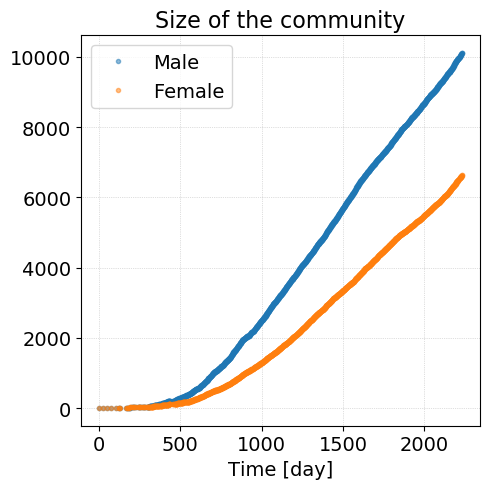

In [19]:
# %% size of the community
plt.figure()
plt.title("Size of the community")
plt.plot(current_time, tot_male_t, "."  , label="Male"  , alpha=.5)
plt.plot(current_time, tot_female_t, ".", label="Female", alpha=.5)
plt.xlabel("Time [day]")
plt.legend()
plt.savefig("./Figure/Static/Size_community.pdf")
plt.show()


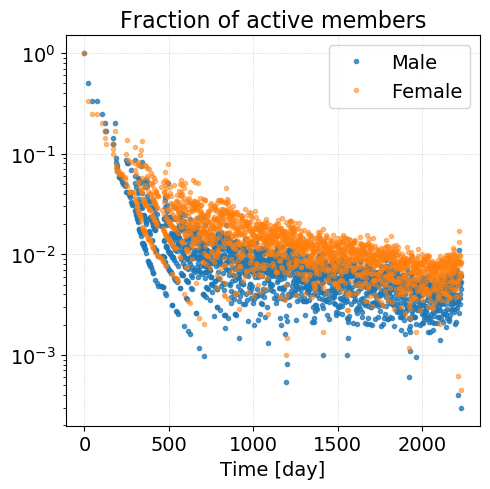

In [21]:
# %% fraction of active members in the community
plt.figure()
plt.title("Fraction of active members")
plt.plot(current_time, np.divide(active_male, tot_male_t), ".", label="Male", alpha=.75)
plt.plot(current_time, np.divide(active_female, tot_female_t), ".", label="Female", alpha=.5)
plt.xlabel("Time [day]")
plt.yscale("log")
plt.legend()
plt.savefig("./Figure/Static/Fraction_ctive_members.pdf")
plt.show()


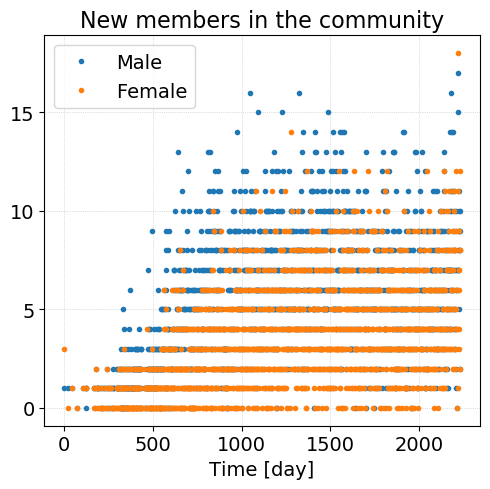

In [25]:
# %% new members in the community
plt.figure()
plt.title("New members in the community")
plt.plot(current_time, np.diff(tot_male_t, prepend=0), "." , label="Male")
plt.plot(current_time, np.diff(tot_female_t, prepend=0), ".", label="Female")
plt.xlabel("Time [day]")
plt.yticks(np.arange(18, step=5))
plt.legend()
plt.savefig("./Figure/Static/New_Members.pdf")
plt.show()
